<h1>Parte 1 - Resolução para achar DDPs dos nós

Equação de Poisson para o caso o meio heterogeneo no caso heterogêneo: 
$\nabla^2 \dot{V} = - \frac{\rho v}{\epsilon_0(1+\epsilon_r)}$ 

Equação de Laplace: $\nabla^2 \dot{V} = 0 $

A partir dessas duas equações, pode-se inferir que: <br>
$\frac{d^2V}{d^2z}$ = $\frac{\rho_0}{\epsilon}$ <br>
$V(z) = \frac{\rho_0}{2\epsilon}z^2 + az + b$ <br>

Além disso, é possivel definir as condições de retorno para o caso : V(0) = 0 e V(d) = $V_0$

<em>Assim, com essas equações e condições de contorno, é possivel descobrir a seguinte equação para V(z) : <em><br>

$V(z) = \frac{\rho_0}{2\epsilon}z^2 -(\frac{V_0}{d}+\frac{\rho_0d}{2\epsilon})z + V_0$ <br>

<h4> Fazendo a dicretização do domínio

Supondo que a divisão é feita em $N_e$ elementos ao longo do eixo z temos que:

$l_e = \frac{d}{N_e}$ <br>
Obs: Sendo $l_e$ o tamanho de cada segmento no eixo z <br>
Dai, sendo $N_n$ o numero de nós : $N_n = N_e + 1$

<h6>Sistema Linear interpolando os termos

$K^e = \frac{\epsilon_0(1+\epsilon_r)^e}{l_e} \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}$

$f^e = - \frac{\rho_0 l_e}{2} \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

Sistema : $\begin{bmatrix} K^1_{11} & K^1_{12} & 0 & 0 & \dots & 0 & 0 & 0\\ K^1_{21} & K^1_{22} + K^2_{11}  & K^2_{12} & 0 & \dots & 0 & 0 & 0 \\ 
0 & K^2_{21} & K^2_{22} + K^3_{11}  & K^3_{12} & \dots & 0 & 0 & 0 \\ 
\vdots & \vdots &  \vdots &  \vdots & \vdots & \vdots & \vdots & \vdots \\
 0 & 0 & 0 & 0 & \dots & K^{Ne-1}_{21} & K^{Ne-1}_{22} + K^{Ne}_{11} & K^{Ne}_{12} \\
 0 & 0 & 0 & 0 & \dots & 0 & K^{Ne}_{21} & K^{Ne}_{22} \end{bmatrix}
 \begin{bmatrix} V_1 \\ V_2 \\ V_3 \\ \vdots \\ V_{N_e -1} \\ V_{N_e} \\ V_{N_e +1} \end{bmatrix} = 
 \begin{bmatrix} f^1_1 \\ f^1_2 + f^2_1 \\ f^2_2 + f^3_1 \\ \vdots \\ f^{N_e-1}_2 + f^{N_e}_1 \\ f^{N_e}_2 \\ \end{bmatrix}
 \begin{bmatrix} D_z (d) \\ 0\\ 0\\ 0\\ 0\\-D_z (0) \end{bmatrix}
 $

<h2> Condições de contorno

- $V_1 = 0$
- $V_n = V_0$

A <ins>primeira e última linha da matriz de K são eliminadas</ins> por essas condições e a <ins>1a e última coluna são passadas para o termo independente</ins> logo temos o sistema de equações da seguinte forma:<br>
<br>
<br>
\begin{align}
       K_{22}V_2 + K_{23}V_3 + K_{24}V_4 + ... + K_{2(N-1)}V_{N-1} = b_2 - K_{2N}V_0 \\
       K_{32}V_2 + K_{33}V_3 + K_{34}V_4 + ... + K_{3(N-1)}V_{N-1} = b_3 - K_{3N}V_0 \\
       K_{42}V_2 + K_{43}V_3 + K_{44}V_4 + ... + K_{4(N-1)}V_{N-1} = b_4 - K_{4N}V_0 \\
       \vdots \\
       K_{(N-1)2}V_2 + K_{(N-1)3}V_3 + K_{(N-1)4}V_4 + ... + K_{(N-1)(N-1)}V_{N-1} = b_{N-1} - K_{(N-1)N}V_0
\end{align} 

<h1> Parte 2 - Código para achar DDPs dos nós

In [3]:
import numpy as np
import math

<h5>Utilizando o Epsilon Heterogêneo (Considerando que o Epsilon de um segmento é a media dois nós nas bordas)

In [4]:
def epsilonFunc(epsilonR, z, d):
    epsilonZero = 8.85*(10**-12)
    return epsilonZero*(1+((epsilonR*z)/d))

<h5> Função para gerar a matriz dos elementos K

In [5]:
#Pra calcular a matrizK eu vou pegar a média dos valores da função Epsilon entre os nós de um segmento
def valoresBaseMatriz(N, epsilonR, le, d):
    placeholder = np.zeros((N, N)) 
    
    for i in range(0,N):
        for j in range(0, N):
            if ((i == 0 and j == 0) or (i == N-1 and j == N-1)): 
                z1 = le*i
                z2 = le*(i+1)
                placeholder[i][j] = (epsilonFunc(epsilonR, z1, d) + epsilonFunc(epsilonR, z2, d))/2
            elif(i == j):
                z1 = le*i
                z2 = le*(i+1)
                z3 = le*(i-1)
                placeholder[i][j] = (epsilonFunc(epsilonR, z1, d) +  epsilonFunc(epsilonR, z2, d))/2  + (epsilonFunc(epsilonR, z3, d) + epsilonFunc(epsilonR, z1, d))/2 # a diagonal tem 2 termos, menos o 1o e ultimo termo nela
            elif(j-1 == i or j+1 == i or i-1 == j or i+1 == j): #todos os termos ao lado da diagonal são -1
                if(j>i): 
                    z1 = le*i
                    z2 = le*(i+1)
                else: 
                    z1 = le*j
                    z2 = le*(j+1)
                placeholder[i][j] = -(epsilonFunc(epsilonR, z1, d) + epsilonFunc(epsilonR, z2, d))/2
    return placeholder

<h5> Preparando a matriz base dos elementos K

In [6]:
## usando agora que V_1 = 0 e V_n = V_0 preciso dropar a última e 1a linha 
#Funcionando OK
def preprocessamento(Ne, d, epsilonR):
    l = d/Ne
    matrizK = valoresBaseMatriz(Ne, epsilonR, l, d) # Ne
    
    linhas, colunas = matrizK.shape
    #valores que são passados pra direita da equação
    colunaMovidaNe = [row[colunas-1] for row in matrizK]
    colunaMovida0 = [row[0] for row in matrizK]
    colunaMovidaNe = np.multiply(colunaMovidaNe, -1) ##são passados para o outro lado, logo o multiplica-se por -1
    colunaMovida0 = np.multiply(colunaMovida0, -1)
    
    #A partir das condições de contorno
    ##tirar a 1a e ultima linha 
    matrizK = np.delete(matrizK, [0, linhas-1], 0)
    ##dropar a coluna 1 e Ne
    matrizK = np.delete(matrizK, 0, 1)
    matrizK = np.delete(matrizK, colunas-2, 1)
    return matrizK, colunaMovida0, colunaMovidaNe

<h5>Utilizando a função da carga

In [7]:
def chargeFunc(le, Ne, rho):
    tamanho = Ne-2 ## Ne-2 pq tiramos a 1a e ultima coluna, os termos conhecidos
    placeholder = np.zeros((tamanho,1))
    for i in range(0,tamanho):
        if(i == 0 or i == tamanho-1):
            placeholder[i][0] = -((rho*le)/2)
        else:
            placeholder[i][0] = -2*((rho*le)/2)
    
    #print(placeholder)
    #no nosso caso existem 0 cargas
    return placeholder

<h5> Processo final de resolução das ddps nos nós

In [8]:
#computando o valor final do lado direito da equação(depois do =)
def processaMatriz(colunaMovida0, colunaMovidaNe, Ne, Vneg, Vpos):
    colunaMovida0 = np.delete(colunaMovida0, 0)
    colunaMovida0 = np.delete(colunaMovida0, Ne-2)

    colunaMovidaNe = np.delete(colunaMovidaNe, 0)
    colunaMovidaNe = np.delete(colunaMovidaNe, Ne-2)
    #print(colunaMovida0)
    #print(colunaMovidaNe)
    
    colunaMovida0_final = np.multiply(Vneg, colunaMovida0)
    colunaMovidaNe_final = np.multiply(Vpos,colunaMovidaNe)
    
    return (colunaMovida0_final + colunaMovidaNe_final)

In [9]:
def resolveSistema1D(matrizK, colunasMovidas, le, Ne, rho):
    ##resolver a matriz
    equerda = matrizK
    direita = colunasMovidas + chargeFunc(le, Ne, rho)
    x = np.linalg.solve(equerda, direita)
    #print(x)
    return x

<h1>Parte 3 - Capacitância

Agora para achar a capacitância: <br>
$C = \frac{K\epsilon_0 A}{d} = \frac{Q}{V}$ <br>

Sabe-se, também, que: <br> $E = \frac{Q}{K\epsilon_0A}$ <br> $V = Ed$

Além disso: $V = Ed$

Daí, $C = \frac{Q}{\frac{Qd}{K\epsilon_0A}} = \frac{\epsilon_0A}{\frac{d}{K}}$ 

Portanto, com vários nós será: $C = \frac{\epsilon_0A}{\frac{d}{K_1} + \frac{d}{K_2} + \dots + \frac{d}{K_{N}}}$

Sendo $K = \frac{\epsilon_r}{\epsilon_0}$ , lembrando que $\epsilon_r$ aqui se refere à permissividade relativa <br>
Obs : $K = 1+\frac{\epsilon_rz}{d}$ no caso específico da questão e o 'd' para todos os nós sera $l_e$ 

Logo, baseando se na fórmula demonstada anteriormente, posso calcula a capacitância da seguinte maneira:

In [37]:
#essa função sera usada para achar a capacitância de todos os segmentos juntos
#de maneira semelhante à feita com as ddps dos nós, vou pegar o valor médio da função epsilon pra computar os valor do epsilon do segmento atual
def acharCap(Ne, epsilonR, L, le, d):
    A = L**2
    epsilonZero = 8.85*(10**(-12))
    dividendo = epsilonZero * A
    divisor = 0
    for i in range(0, Ne):
        z1 = le*i 
        z2 = le*(i+1)
        epsilonAtual = (epsilonFunc(epsilonR, z1, d) + epsilonFunc(epsilonR, z2, d)) / (2*epsilonZero)
        
        divisor += le/(epsilonAtual/epsilonZero)
    
    return (dividendo/divisor)

<h1> Parte 4 - Caso específico

In [11]:
import numpy as np
Ne = 5
d = 10**(-3)
le = d/Ne
epsilonR = 3
rho = 0
Vpos = 1
Vneg = 0

matrizK, colunaMovida0, colunaMovidaNe = preprocessamento(Ne+1, d, epsilonR) # Ne+1 = Nn
print(matrizK)

[[ 2.65500e-11 -1.54875e-11  0.00000e+00  0.00000e+00]
 [-1.54875e-11  3.54000e-11 -1.99125e-11  0.00000e+00]
 [ 0.00000e+00 -1.99125e-11  4.42500e-11 -2.43375e-11]
 [ 0.00000e+00  0.00000e+00 -2.43375e-11  5.31000e-11]]


In [14]:
#Tirando a 1a e ultima linha das colunas movidas e somando com os valores das condições iniciais para a parte direita da equação total
colunaDireitaEquação = processaMatriz(colunaMovida0, colunaMovidaNe, Ne+1, Vneg, Vpos)
colunaDireitaEquação = np.reshape(colunaDireitaEquação, (Ne-1,1))
print(colunaDireitaEquação)

[[ 0.00000e+00]
 [-0.00000e+00]
 [-0.00000e+00]
 [ 2.87625e-11]]


In [15]:
NodesResult = resolveSistema1D(matrizK, colunaDireitaEquação, le, Ne+1, rho)
print(NodesResult)

[[0.32164661]
 [0.55139419]
 [0.73008676]
 [0.87628976]]


In [42]:
import matplotlib.pyplot as plt
def plotaN(Ne, le, Vneg, Vpos, NodesResult):
    #os pontos no eixo z
    pontosZ = []
    for i in range(0,Ne+1):
        pontosZ.append(i*le)
        
    dots = []
    dots.append(Vneg)
    for i in range(0, Ne-1):
        dots.append(NodesResult[i][0])
    dots.append(Vpos) # entra no final
    
    return pontosZ, dots

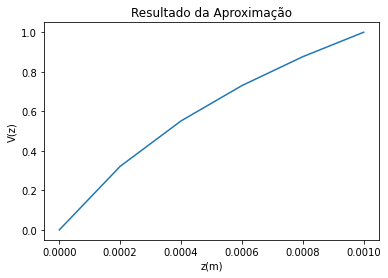

In [28]:
pontosZ, dots = plotaN(Ne, le, Vneg, Vpos, NodesResult)
plt.plot(pontosZ, dots)
plt.title('Resultado da Aproximação')
plt.xlabel('z(m)')
plt.ylabel('V(z)')
plt.show()

<h1> Parte 5 - Múltiplos Valores de N para o caso específico

In [29]:
def testaUmCaso(rho, Vpos, Vneg, epsilonR, le, d, Natual):
    matrizK, colunaMovida0, colunaMovidaNe = preprocessamento(Natual+1, d, epsilonR)  # Ne+1 = Nn
    colunaDireitaEquação = processaMatriz(colunaMovida0, colunaMovidaNe, Natual+1, Vneg, Vpos)
    colunaDireitaEquação = np.reshape(colunaDireitaEquação, (Natual-1,1))
    NodesResult = resolveSistema1D(matrizK, colunaDireitaEquação, le, Natual+1, rho)
    return NodesResult

Quantos N deseja colocar?
3
Digite o N de segmentos:
8
Digite o N de segmentos:
7
Digite o N de segmentos:
5


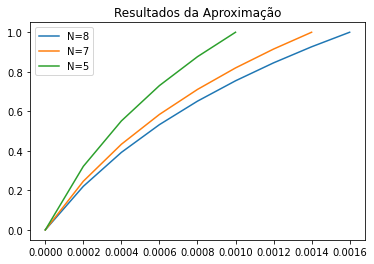

In [36]:
import numpy as np
d = 10**(-3)
le = d/Ne
epsilonR = 3
rho = 0
Vpos = 1
Vneg = 0

Ndesejados = []
Nreferencias = []
leDesejados = []
print("Quantos N deseja colocar?")
Ntotal = int(input())
for i in range(0, Ntotal):
    print("Digite o N de segmentos:")  
    Natual = int(input())
    Nreferencias.append(Natual)
    le = d/Natual
    leDesejados.append(le)
    resultadoAtual = testaUmCaso(rho, Vpos, Vneg, epsilonR, le, d, Natual)
    Ndesejados.append(resultadoAtual)
    
for i in range(0, Ntotal):
    leAtual = leDesejados[i]
    resultadoAtual = Ndesejados[i]
    Natual = Nreferencias[i]
    final = testaUmCaso(rho, Vpos, Vneg, epsilonR, le, d, Natual)
    dots, Vplots = plotaN(Natual, le, Vneg, Vpos, final)
    plt.plot(dots, Vplots, label = "N=" + str(Natual))

plt.title('Resultados da Aproximação')
plt.xlabel("z(m)")
plt.ylabel("V(z)")
plt.legend()
plt.show()

<h1> Parte 6 - Capacitância para múltiplos valores de N

In [43]:
Ntotal = int(input("Digite quantos valores de N deseja-se testar:"))

arrayN = []
for i in range(0,Ntotal):
    atual = int(input("Digite o valor do " + str(i+1) + "o N:"))
    arrayN.append(atual)

Digite quantos valores de N deseja-se testar:4
Digite o valor do 1o N:4
Digite o valor do 2o N:5
Digite o valor do 3o N:6
Digite o valor do 4o N:7


In [44]:
import numpy as np

d = 10**(-3)
L = 4*(10**-2)
epsilonR = 3
rho = 0
Vpos = 1
Vneg = 0

Plotando resultados para diferentes N

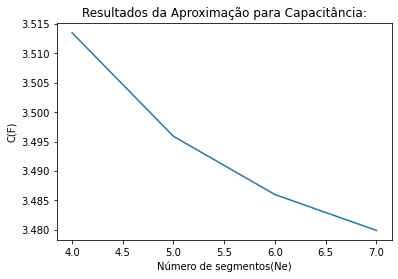

In [55]:
import matplotlib.pyplot as plt
cTotais=[]
for i in range(0, Ntotal):
    Ne = arrayN[i]
    le = d/Ne
    atual = acharCap(Ne, epsilonR, L, le, d)
    cTotais.append(atual)

plt.plot(arrayN, cTotais)
plt.title('Resultados da Aproximação para Capacitância:')
plt.xlabel("Número de segmentos(Ne)")
plt.ylabel("C(F)")
plt.show()